# Quick view: OceanSODA-ETHZ

In [1]:
import intake
import config

In [2]:
cat = intake.open_catalog("gridded-obs.yml")
print(cat.yaml())

sources:
  gridded-obs:
    args:
      path: gridded-obs.yml
    description: Gridded Ocean Biogeochemistry Products
    driver: intake.catalog.local.YAMLFileCatalog
    metadata: {}



## OceanSODA-ETHZ
A global gridded dataset of the surface ocean carbonate system for seasonal to decadal studies of ocean acidification (v2023) (NCEI Accession 0220059)

In [3]:
source = "OceanSODA-ETHZ_v2023"
print(cat[source].description)

This dataset contains a global gridded dataset of the surface ocean carbonate system for seasonal to decadal studies of ocean acidification (v2023). The full marine carbonate system is calculated from machine learning estimates of Total Alkalinity (TA) and the fugacity of carbon dioxide (fCO2). The surface-ocean fCO2 presented here is the ensemble mean of 16 two-step clustering-regression machine learning estimates. The ensemble is a combination of eight clustering instances and two regression methods. For the clustering, we use K-means clustering (21 clusters) repeated with different initiations, resulting in slightly different clusters. Two machine learning regression methods are applied to each of these clustering instances. These machine learning methods are feed-forward neural-network (FFNN), and gradient boosted machine using decision trees (GBDT). The average of the ensemble members is used as the final estimate. Further, the standard deviation of the ensemble members is an anal

In [4]:
ds = cat[source].to_dask()
ds

<xarray.Dataset>
Dimensions:          (time: 492, lat: 180, lon: 360, region: 4)
Coordinates:
  * time             (time) datetime64[ns] 1982-01-15 1982-02-15 ... 2022-12-15
  * lat              (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon              (lon) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * region           (region) object 'global' 'north' 'tropics' 'south'
Data variables: (12/28)
    talk             (time, lat, lon) float32 dask.array<chunksize=(492, 180, 360), meta=np.ndarray>
    dic              (time, lat, lon) float32 dask.array<chunksize=(492, 180, 360), meta=np.ndarray>
    spco2            (time, lat, lon) float32 dask.array<chunksize=(492, 180, 360), meta=np.ndarray>
    sfco2            (time, lat, lon) float32 dask.array<chunksize=(492, 180, 360), meta=np.ndarray>
    ph_total         (time, lat, lon) float32 dask.array<chunksize=(492, 180, 360), meta=np.ndarray>
    ph_free          (time, lat, lon) float32 dask.array<chunksize=(492, 180, 360), meta=np.ndarray>
    ...               ...
    area             (lat, lon) float32 dask.array<chunksize=(180, 360), meta=np.ndarray>
    fgco2_reg        (region, time) float32 dask.array<chunksize=(4, 492), meta=np.ndarray>
    area_reg         (region) float32 dask.array<chunksize=(4,), meta=np.ndarray>
    ice              (time, lat, lon) float32 dask.array<chunksize=(492, 180, 360), meta=np.ndarray>
    kw               (time, lat, lon) float32 dask.array<chunksize=(492, 180, 360), meta=np.ndarray>
    sol              (time, lat, lon) float32 dask.array<chunksize=(492, 180, 360), meta=np.ndarray>
Attributes:
    contact:      gregorl@ethz.ch
    author:       Luke Gregor
    institution:  ETH Zuerich
    version:      v2023.GCB
    date:         2023-06-26
    description:  talk and pco2 (more accurately fco2) are estimated with two...
    changelog:    v2021d: Extended from 1982-2020; Now using: OISSTv2.1 for S...
    reference:    Gregor, L. and Gruber, N.: OceanSODA-ETHZ: A global gridded...
    source:       https://doi.org/10.25921/m5wx-ja34
    product:      OSETHZ-v2023.GCB

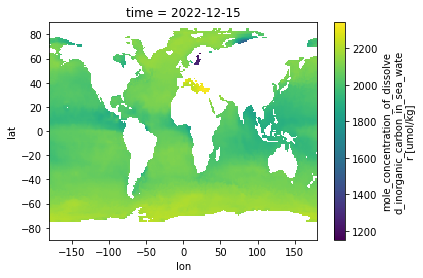

In [5]:
ds.dic.isel(time=-1).plot()